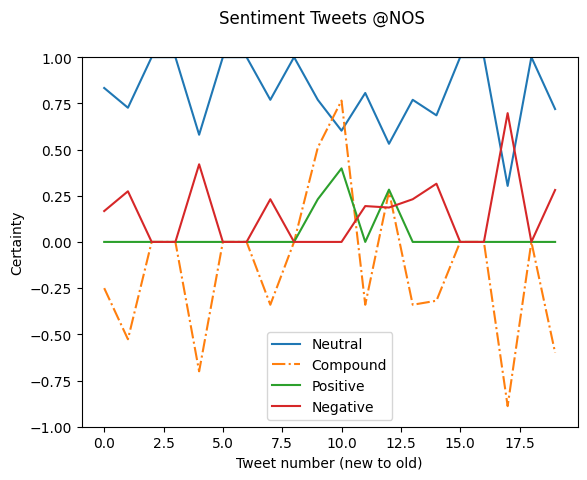

Time run: 2022-09-21 12:44:04.624739


In [1]:
import tweepy #Twitter client
import datetime
import nltk #Sentiment NLP analyse
from nltk.sentiment.vader import SentimentIntensityAnalyzer #Vader 
import matplotlib.pyplot as pyplot #Library voor grafiek.
import deep_translator #Vertaal library

# Haalt de laatste "amount" tweets op van de gebruiker "userid". 
def get_tweets_from_userid(token, userid, amount):
    client = tweepy.Client(bearer_token=token)

    paginator = tweepy.Paginator(
        client.get_users_tweets, id=userid, max_results=amount)

#Text van die tweets haalt op en zet in een lijst.
    tweets = []
    for tweet in paginator.flatten(limit=amount):
        tweets.append(tweet.text)

    return tweets

# Vertaal een lijst met strings.
def translate_tweets(tweets):
    translated_tweets = deep_translator.GoogleTranslator(
        source="nl", target="en").translate_batch(tweets)
    return translated_tweets

# Rekent het sentiment uit voor elke string in de lijst en geeft deze terug als score in 4 lijsten: neg, neu, pos, compound.
def calculate_sentiment(tweets):
    #Score van de tweet zelf.
    neg = []
    neu = []
    pos = []
    compound = []

    for tweet in tweets:
        #Tweet, dus alle teskst opsplitsen in aparte zinnen.
        lines = nltk.tokenize.sent_tokenize(tweet)

        #Score van alle zinnen in een tweet.
        neg_lines = []
        neu_lines = []
        pos_lines = []
        compound_lines = []

        for line in lines:
            #Voor elke zin in de tokenize tweet, wordt het sentiment uitgerekend.
            ss = SentimentIntensityAnalyzer().polarity_scores(line)
            #Toevoegen bij de algemene score van alle tweets.
            neg_lines.append(ss["neg"])
            neu_lines.append(ss["neu"])
            pos_lines.append(ss["pos"])
            compound_lines.append(ss["compound"])

        #Gemiddeldes uitrekenen.
        neg.append(sum(neg_lines) / len(neg_lines))
        neu.append(sum(neu_lines) / len(neu_lines))
        pos.append(sum(pos_lines) / len(pos_lines))
        compound.append(sum(compound_lines) / len(compound_lines))

    return neg, neu, pos, compound

# Plot een grafiek met de lijsten: neg, neu, pos en compound
def plot_graph(neg, neu, pos, compound):
    pyplot.ylim((-1.0, 1.0))
    pyplot.xlabel("Tweet number (new to old)")
    pyplot.ylabel("Certainty")

    pyplot.plot(neu, label="Neutral")
    pyplot.plot(compound, label="Compound", linestyle='dashdot')
    pyplot.plot(pos, label="Positive")
    pyplot.plot(neg, label="Negative")

    pyplot.legend()
    pyplot.suptitle('Sentiment Tweets @NOS')
    pyplot.show()


tweets = get_tweets_from_userid(
    "AAAAAAAAAAAAAAAAAAAAAMREhAEAAAAAUyTLCpMhUzUtvTAH%2FQBGnduHwhU%3Dqrf0rs2d2j891MmZr2SGQKkPonhsjI5fNrAYM2GHYxp9Rw46Lm", "7174972", 20)
neg, neu, pos, compound = calculate_sentiment(translate_tweets(tweets))
for tweet in tweets:
    translateTweets = translate_tweets(tweets)
#print(translate_tweets(tweets))
plot_graph(neg, neu, pos, compound)
current_time = datetime.datetime.now()
print("Time run:", current_time)
